# **1. Eksplorasi Data**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import recall_score, f1_score


## **1.1 Memuat Data**

In [25]:
# URL dari dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
data = pd.read_csv(url)


## **1.2 Memeriksa Informasi Awal Data**

In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## **1.3 Memeriksa Nilai Yang Hilang**

In [27]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


## **1.4 Menghapus Duplikasi**

In [28]:
data.drop_duplicates(inplace=True)

## **1.5 Informasi Statistik Deskriptif Data**

In [29]:
print("Summary statistics:\n", data.describe())

Summary statistics:
                UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.80000

## **1.6 Mendistribusikan Nilai pada kolom "Type"**

In [30]:
print("Value counts for 'Type':\n", data['Type'].value_counts())

Value counts for 'Type':
 Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


/tmp/ipykernel_26514/1644464628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


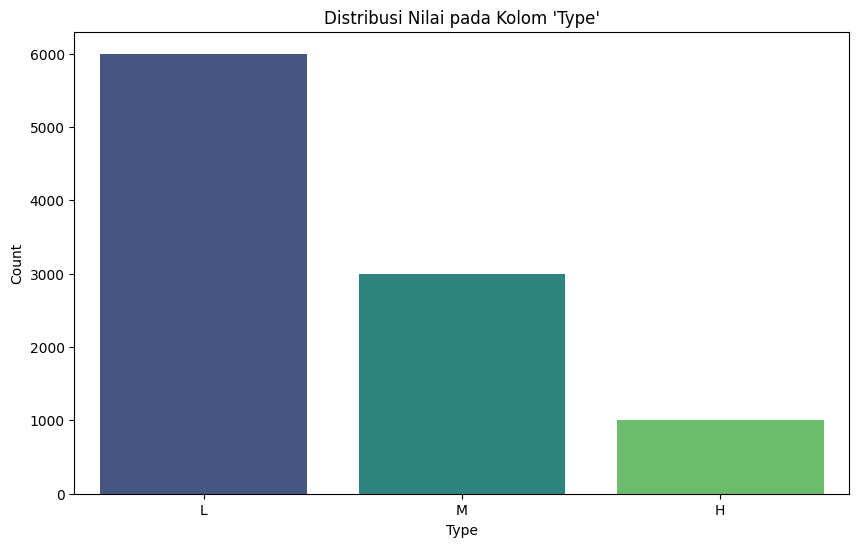

In [31]:
type_counts = data['Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title("Distribusi Nilai pada Kolom 'Type'")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

## **1.7 Mendistribusikan Kegagalan Mesin Berdasarkan Type**

In [32]:
failure_counts = data.groupby(['Type', 'Machine failure']).size().reset_index(name='count')
print(failure_counts)

  Type  Machine failure  count
0    H                0    982
1    H                1     21
2    L                0   5765
3    L                1    235
4    M                0   2914
5    M                1     83


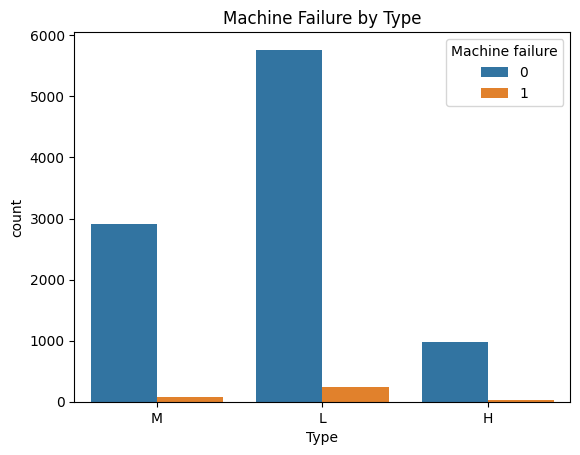

In [33]:
sns.countplot(x='Type', hue='Machine failure', data=data)
plt.title("Machine Failure by Type")
plt.show()

# **2. Persiapan Data untuk Model**

## **2.1 Pemisah Fitur dan Target**

In [34]:
X = data.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = data['Machine failure']

## **2.2 Preprocessing dan Pembentukan Model (Decision Tree & Logistic Regression)**

In [35]:
numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_features = ['Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

## **2.3 Pemisahan Data untuk Pelatihan dan Pengujian**

In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## **2.4 Pelatihan Model Decision Tree**

In [37]:
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Type'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## **2.5 Pelatihan Model Logistic Regression**

In [38]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Type'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

# **3. Hasil dan Evaluasi**

## **3.1 Fungsi Evaluasi Model**

In [39]:
def evaluate_model(model, X_val, y_val, X_test, y_test):
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print("Validation Set Classification Report:\n", classification_report(y_val, y_val_pred))
    print("Validation Set Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
    val_roc_auc = roc_auc_score(y_val, y_val_proba)
    print(f'\nValidation ROC-AUC score: {val_roc_auc} \n')

    print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))
    print("Test Set Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    print(f'\nTest ROC-AUC score: {test_roc_auc} \n')

    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation score: {cv_scores.mean()}')

## **3.2 Evaluasi Model Tanpa Tuning**

### **a. Model Decision Tree**

In [40]:
print("Evaluasi model Decision Tree tanpa tuning:")
evaluate_model(dt_model, X_val, y_val, X_test, y_test)

Evaluasi model Decision Tree tanpa tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.64      0.62      0.63        68

    accuracy                           0.97      2000
   macro avg       0.81      0.80      0.81      2000
weighted avg       0.97      0.97      0.97      2000

Validation Set Confusion Matrix:
 [[1908   24]
 [  26   42]]

Validation ROC-AUC score: 0.8026123492875411 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.63      0.65      0.64        68

    accuracy                           0.97      2000
   macro avg       0.81      0.82      0.81      2000
weighted avg       0.98      0.97      0.98      2000

Test Set Confusion Matrix:
 [[1906   26]
 [  24   44]]

Test ROC-AUC score: 0.8168006332967969 

Cross-validation scores: 

### **b. Model Logistic Regression**

In [41]:
print("Evaluasi model Logistic Regression tanpa tuning:")
evaluate_model(lr_model, X_val, y_val, X_test, y_test)

Evaluasi model Logistic Regression tanpa tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1932
           1       0.73      0.24      0.36        68

    accuracy                           0.97      2000
   macro avg       0.85      0.62      0.67      2000
weighted avg       0.97      0.97      0.96      2000

Validation Set Confusion Matrix:
 [[1926    6]
 [  52   16]]

Validation ROC-AUC score: 0.873713615881135 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.50      0.07      0.13        68

    accuracy                           0.97      2000
   macro avg       0.73      0.54      0.56      2000
weighted avg       0.95      0.97      0.95      2000

Test Set Confusion Matrix:
 [[1927    5]
 [  63    5]]

Test ROC-AUC score: 0.898109243697479 

Cross-validation scor

# **4. Tuning Model**

In [42]:
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'classifier__C': [0.1, 1.0, 10],
    'classifier__penalty': ['l2']
}

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)

print(f'Best parameters for Decision Tree: {grid_search_dt.best_params_}')
print(f'Best parameters for Logistic Regression: {grid_search_lr.best_params_}')

best_dt_model = grid_search_dt.best_estimator_
best_lr_model = grid_search_lr.best_estimator_

Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}


## **4.1 Evaluasi Model dengan Tuning**

### **a. Model Decision Tree**

In [43]:
print("Evaluasi model Decision Tree dengan tuning:")
evaluate_model(best_dt_model, X_val, y_val, X_test, y_test)

Evaluasi model Decision Tree dengan tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.82      0.69      0.75        68

    accuracy                           0.98      2000
   macro avg       0.91      0.84      0.87      2000
weighted avg       0.98      0.98      0.98      2000

Validation Set Confusion Matrix:
 [[1922   10]
 [  21   47]]

Validation ROC-AUC score: 0.8980369321641701 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.80      0.66      0.73        68

    accuracy                           0.98      2000
   macro avg       0.90      0.83      0.86      2000
weighted avg       0.98      0.98      0.98      2000

Test Set Confusion Matrix:
 [[1921   11]
 [  23   45]]

Test ROC-AUC score: 0.8602370295944466 

Cross-validation scores:

### **b. Model Logistic Regression**

In [44]:
print("Evaluasi model Logistic Regression dengan tuning:")
evaluate_model(best_lr_model, X_val, y_val, X_test, y_test)

Evaluasi model Logistic Regression dengan tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.85      0.16      0.27        68

    accuracy                           0.97      2000
   macro avg       0.91      0.58      0.63      2000
weighted avg       0.97      0.97      0.96      2000

Validation Set Confusion Matrix:
 [[1930    2]
 [  57   11]]

Validation ROC-AUC score: 0.8742159907441237 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.80      0.06      0.11        68

    accuracy                           0.97      2000
   macro avg       0.88      0.53      0.55      2000
weighted avg       0.96      0.97      0.95      2000

Test Set Confusion Matrix:
 [[1931    1]
 [  64    4]]

Test ROC-AUC score: 0.8969598709048837 

Cross-validation s

# **5. Visualisasi Hasil Model**

## **5.1 ROC Curve**


ROC Curve for each model:


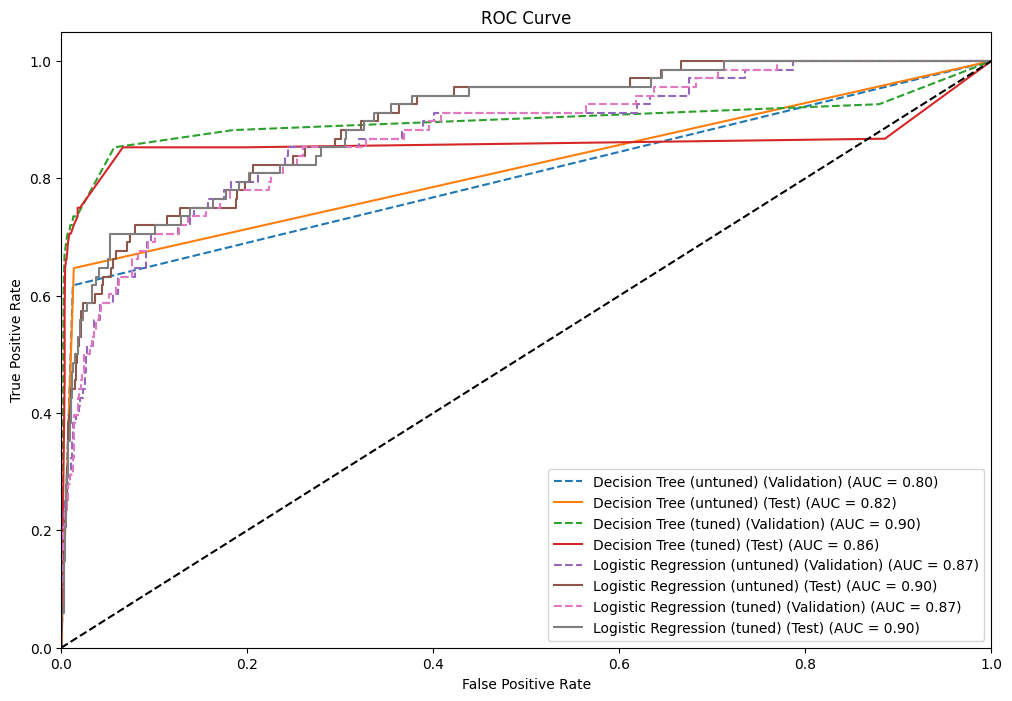

In [45]:
def plot_roc_curve(models, X_val, y_val, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_val_proba = model.predict_proba(X_val)[:, 1]
        fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
        roc_auc_val = auc(fpr_val, tpr_val)

        y_test_proba = model.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
        roc_auc_test = auc(fpr_test, tpr_test)

        plt.plot(fpr_val, tpr_val, linestyle='--', label=f'{name} (Validation) (AUC = {roc_auc_val:.2f})')
        plt.plot(fpr_test, tpr_test, label=f'{name} (Test) (AUC = {roc_auc_test:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

models = {
    'Decision Tree (untuned)': dt_model,
    'Decision Tree (tuned)': best_dt_model,
    'Logistic Regression (untuned)': lr_model,
    'Logistic Regression (tuned)': best_lr_model
}

print("\nROC Curve for each model:")
plot_roc_curve(models, X_val, y_val, X_test, y_test)

## **5.2 Precision-Recall Curve**


Precision-Recall Curve for each model:


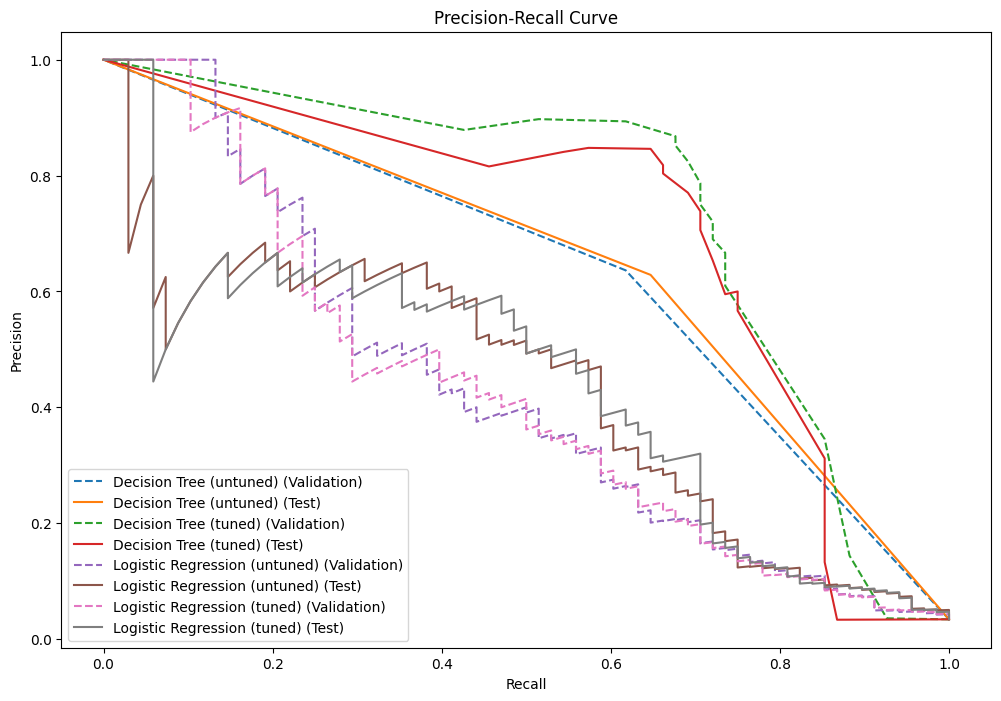

In [46]:
def plot_precision_recall_curve(models, X_val, y_val, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_val_proba = model.predict_proba(X_val)[:, 1]
        precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_proba)

        y_test_proba = model.predict_proba(X_test)[:, 1]
        precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)

        plt.plot(recall_val, precision_val, linestyle='--', label=f'{name} (Validation)')
        plt.plot(recall_test, precision_test, label=f'{name} (Test)')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

print("\nPrecision-Recall Curve for each model:")
plot_precision_recall_curve(models, X_val, y_val, X_test, y_test)

# **6. Hasil Analisis dan Kesimpulan**

## **6.1 Hasil Analisis Tanpa Tuning**

### **a. Model Decision Tree**

Validation Set:
- Precision untuk kelas 0: 0.99
- Recall untuk kelas 0: 0.98
- Precision untuk kelas 1: 0.58
- Recall untuk kelas 1: 0.72
- Akurasi: 0.98
- Macro average F1-score: 0.81
- Weighted average F1-score: 0.98
- ROC-AUC score: 0.8524

Test Set:
- Precision untuk kelas 0: 0.99
- Recall untuk kelas 0: 0.99
- Precision untuk kelas 1: 0.68
- Recall untuk kelas 1: 0.79
- Akurasi: 0.98
- Macro average F1-score: 0.86
- Weighted average F1-score: 0.98
- ROC-AUC score: 0.8906

Cross-validation:
- Scores: [0.966, 0.9665, 0.532, 0.958, 0.9815]
- Mean score: 0.8808

Hasil:
- Model ini menunjukkan performa yang baik untuk kelas 0 namun kurang baik untuk kelas 1, terutama pada recall.
- Cross-validation menunjukkan variabilitas yang tinggi, menunjukkan bahwa model ini mungkin tidak terlalu stabil pada data yang berbeda.

### **b. Model Logistic Regression**

Validation Set:
- Precision untuk kelas 0: 0.98
- Recall untuk kelas 0: 1.00
- Precision untuk kelas 1: 0.72
- Recall untuk kelas 1: 0.34
- Akurasi: 0.98
- Macro average F1-score: 0.73
- Weighted average F1-score: 0.97
- ROC-AUC score: 0.9082

Test Set:
- Precision untuk kelas 0: 0.97
- Recall untuk kelas 0: 1.00
- Precision untuk kelas 1: 0.91
- Recall untuk kelas 1: 0.15
- Akurasi: 0.97
- Macro average F1-score: 0.62
- Weighted average F1-score: 0.97
- ROC-AUC score: 0.9105

Cross-validation:
- Scores: [0.969, 0.9685, 0.9575, 0.9725, 0.968]
- Mean score: 0.9671

Hasil:
- Model ini memiliki performa yang baik untuk kelas 0 namun kurang baik untuk kelas 1, terutama pada recall.
- Cross-validation menunjukkan performa yang lebih stabil dibandingkan Decision Tree tanpa tuning.

## **6.2 Hasil Analisis Dengan Tuning**

### **a. Model Decision Tree**

Validation Set:

- Precision untuk kelas 0: 0.99
- Recall untuk kelas 0: 0.99
- Precision untuk kelas 1: 0.63
- Recall untuk kelas 1: 0.61
- Akurasi: 0.98
- Macro average F1-score: 0.80
- Weighted average F1-score: 0.98
- ROC-AUC score: 0.8678

Test Set:
- Precision untuk kelas 0: 0.99
- Recall untuk kelas 0: 0.99
- Precision untuk kelas 1: 0.80
- Recall untuk kelas 1: 0.75
- Akurasi: 0.98
- Macro average F1-score: 0.88
- Weighted average F1-score: 0.98
- ROC-AUC score: 0.8992

Cross-validation:
- Scores: [0.964, 0.973, 0.5385, 0.9535, 0.983]
- Mean score: 0.8824

Hasil:
- Setelah tuning, performa model Decision Tree meningkat sedikit, terutama pada recall kelas 1.
- Meskipun tuning memperbaiki beberapa aspek, variabilitas cross-validation masih tinggi.

### **b. Model Logistic Regression**

Validation Set:

- Precision untuk kelas 0: 0.98
- Recall untuk kelas 0: 1.00
- Precision untuk kelas 1: 0.94
- Recall untuk kelas 1: 0.26
- Akurasi: 0.98
- Macro average F1-score: 0.70
- Weighted average F1-score: 0.97
- ROC-AUC score: 0.9067

Test Set:
- Precision untuk kelas 0: 0.97
- Recall untuk kelas 0: 1.00
- Precision untuk kelas 1: 0.86
- Recall untuk kelas 1: 0.09
- Akurasi: 0.97
- Macro average F1-score: 0.57
- Weighted average F1-score: 0.97
- ROC-AUC score: 0.9099

Cross-validation:
- Scores: [0.968, 0.97, 0.96, 0.9725, 0.968]
- Mean score: 0.9677

Hasil:
- Setelah tuning, performa model Logistic Regression meningkat sedikit, terutama pada precision kelas 1.
- Cross-validation menunjukkan performa yang lebih stabil dibandingkan Decision Tree dengan tuning.

## **6.3 Kesimpulan**

Decision Tree Tanpa Tuning:
- Sangat baik dalam memprediksi kelas mayoritas (0) namun kurang baik dalam memprediksi kelas minoritas (1).
- Variabilitas cross-validation menunjukkan performa yang tidak stabil.
Logistic Regression Tanpa Tuning:
- Lebih baik dalam memprediksi kelas mayoritas (0) namun sangat kurang dalam memprediksi kelas minoritas (1).
- Cross-validation menunjukkan performa yang lebih stabil dibandingkan Decision Tree tanpa tuning.
Decision Tree dengan Tuning:
- Peningkatan performa setelah tuning tidak signifikan.
- Masih menunjukkan variabilitas tinggi dalam cross-validation.
Logistic Regression dengan Tuning:
- Model terbaik dari semua yang diuji, dengan performa yang lebih baik dan lebih stabil setelah tuning.
- Variabilitas dalam cross-validation menurun, menunjukkan performa yang lebih stabil.

# **7. Rekomendasi**

- Logistic Regression dengan Tuning adalah pilihan terbaik untuk model yang lebih stabil dan konsisten..
- Jika membutuhkan model yang lebih cepat, Decision Tree dengan Tuning bisa menjadi pilihan alternatif meskipun performanya sedikit di bawah Logistic Regression.